# K-Means Clustering

## Implementaiton of K-Means Algorithm
1. Select value of K to decide number of clusters to be formed
2. Select random K points that will act as cluster centroids
3. Assign each data point, based on distance from randomly selected point, to the nearest centroid which will form predefined clusters
4. Place new centroid of each cluster
5. Repeat step 3
6. If reassignment occurs, repeat step 4, otherwise finish

## Elbow Method

A way to choose the right number of clusters

### Implementation
1. Execute K-means clustering on dataset for different K values (1-10)
2. Calculate WCSS (within-cluster-sum-of-squares) for each K value
3. Plot curve bewteen WCSS and respective K clusters
4. Bend/sharp point is optimal k value

**1.** Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

**2.** Load data

In [4]:
data = pd.read_csv('Countryclusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


**3.** Select features. Will use lattitude and longitude in this example

In [7]:
X = data.iloc[:,1:3]
X

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


**4.** Determine optimal k value

C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

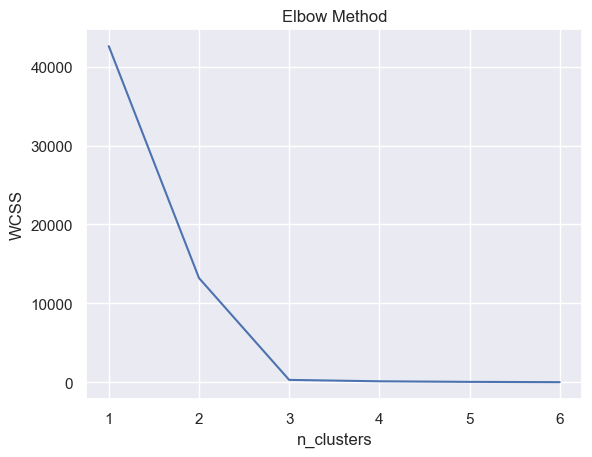

In [8]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title("Elbow Method")
plt.xlabel("n_clusters")
plt.ylabel("WCSS")
plt.show()

Based on the graph, k=3 is the optimal number of clusters

**5.** Cluster data

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

**6.** Clustering results

In [11]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 1, 1, 2])

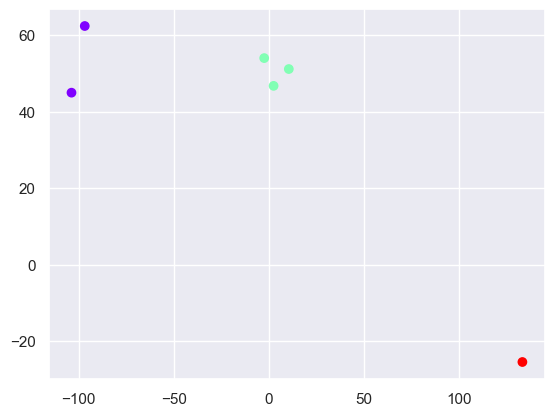

In [13]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Longitude'], 
            data_with_clusters['Latitude'],
            c=data_with_clusters['Clusters'],
            cmap='rainbow')